(stationary_exercise)=
### Stationary time series 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller 

%matplotlib inline

**Introduction:** 

[In the previous exercise](https://mude.citg.tudelft.nl/book/time_series/exercise1.html#) we created and plotted the $Y_4$ time series, now we check its stationarity. Remember that we need to ensure *stationarity* of the time series data-set for *forecasting and predictive models*. 
In this excercise, you can test the stationarity of the time series using transformation and visual inspection and the Augmented Dickey-Fuller (ADF) test (The ADF test is optional). 

**Background knowledge:** 

The ADF test can be performed by using two hypotheses (Null Hypothesis and Alternative Hypothesis):

1. Null Hypothesis $H_o$: we assume that the time series is not stationary. 
2. Althernative Hypothesis $H_a$: we assume that the time series is stationary. 

If the test statistic is smaller than the critical value, the null hypothesis is rejected and therefore the time series is stationary. In this case the the p-value becomes very small. In python, there is a package: **statsmodels** which has the function of **adfuller method**. We use the <code>adfuller()</code> function to test the stationarity of the data-set. Regarding the interpretation of the adfuller function, the first output is the test-statistic, the second one is the p-value, etc.

**Excercise:** 

We take the time series and the noise from the Excercise 1 $Y_2$, $Y_4$ and $\epsilon_t$. We also use the single differencing method to make the time series stationary and plot the results. Later we will also use the least squares method (best linear unbiased estimation - BLUE) to de-trend the data. 

**Note:**

You don't need to focus on the next cell, it contains the code included in the [Time series components exercise](https://mude.citg.tudelft.nl/book/time_series/exercise1.html#) for creating the time series.

In [2]:
np.random.seed(0)  # For reproducibility

# create observations
time = np.arange(501) 
m = len(time)
y_0 = 1 
r = 0.02 
y1 = y_0 + r*time 

# introduce a seasonality
omega = 2 * np.pi/100 
A = 1 
phi_0 = 0.2*np.pi
y2 = y1 + A*np.sin(omega * time + phi_0) 

# introduce offset
t_k = 300 
O_k = 5 
y3 = y2.copy() 
y3[t_k:] = y3[t_k:] + O_k

# introduce random error
mean = 0 
sigma = 0.5 
et = np.random.normal(loc = mean, scale = sigma, size = m) 
y4 = y3 + et 

We start applying single differencing to check whether the time series becomes stationary. We do it first for <code>y2</code>, which just contains the observations and the seasonality.

Text(0.5, 1.0, 'Single Differencing')

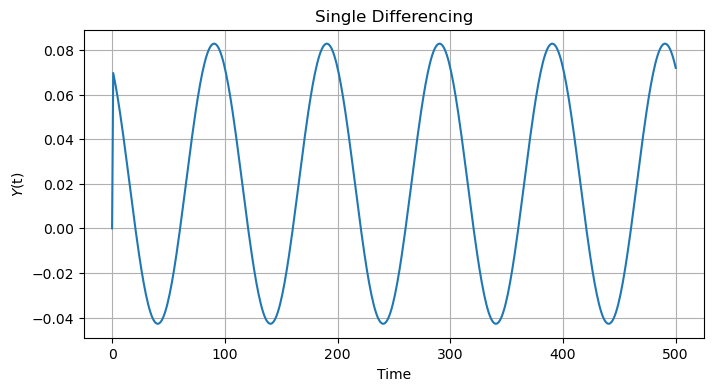

In [3]:
diff_y2 = np.diff(y2)
diff_y2 = np.insert(diff_y2, 0, 0)

plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, diff_y2)
plt.ylabel('$Y$(t)')
plt.xlabel('Time')
plt.title('Single Differencing')

<code>y2</code> clearly looks non-stationary. Can you explain why?

We repeat the above procedure for <code>y4</code>, which also includes offset and noise.

Text(0.5, 1.0, 'Single Differencing')

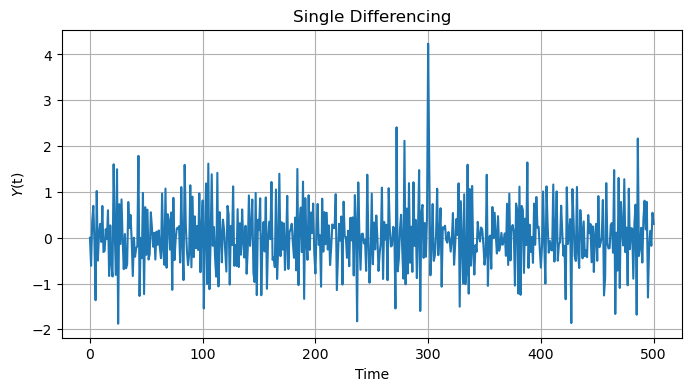

In [4]:
diff_y4 = np.diff(y4)
diff_y4 = np.insert(diff_y4, 0, 0)

plt.figure(figsize=(8,4))
plt.grid()
plt.plot(time, diff_y4)
plt.ylabel('$Y$(t)')
plt.xlabel('Time')
plt.title('Single Differencing')
# it looks stationary, but we show it using ADF test

<code>y4</code> now seems to be stationary, but to prove it we need to do the ADF test, which is optional material.

ADF test is used to show that the single has produced a stationary dataset.

In [5]:
test_diff_y4 = adfuller(diff_y4)
test_statistic = test_diff_y4[0]
p_value = test_diff_y4[1]
critical_value = test_diff_y4[4]
print(f'Test statistics:{test_statistic:.2f}, pvalue:{p_value:.4f}, Critical_value(1%):{critical_value["1%"]:.2f}')

Test statistics:-15.24, pvalue:0.0000, Critical_value(1%):-3.44


Since the test statistic is smaller than the critical value and the p-value is small, the Null hypothesis $H_0$ is rejected. This means that the time series is stationary!